___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [1]:
import pandas as pd
import numpy as np## for plotting
import matplotlib.pyplot as plt
import seaborn as sns## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition## for explainer
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from lime import lime_tabular
from sklearn.linear_model import Ridge
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import dtreeviz
from sklearn.preprocessing import PolynomialFeatures



from sklearn.linear_model import LinearRegression

#Відкрийте файл та виведіть описову статистику
loans = pd.read_csv("loan_data.csv")
loans.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Text(0.5, 0, 'FICO')

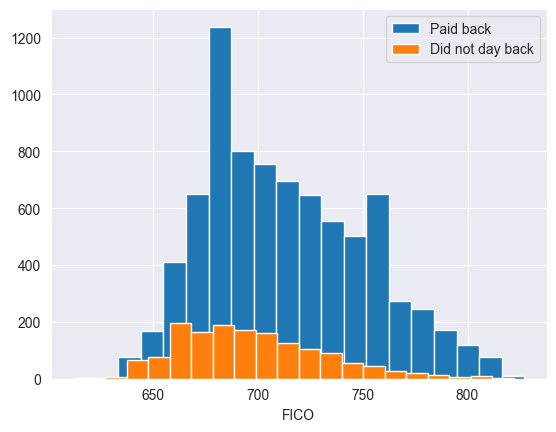

In [2]:
#Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.
sns.set_style('darkgrid')
plt.hist(loans['fico'].loc[loans['not.fully.paid']==0], bins=20, label='Paid back')
plt.hist(loans['fico'].loc[loans['not.fully.paid']==1], bins=20, label='Did not day back')
plt.legend()
plt.xlabel('FICO')

In [3]:
#Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot
#sns.jointplot(x='fico', y='int.rate', data=loans,size=5)

In [4]:
#Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції
#sns.lmplot(data=loans, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set2')



In [5]:
#purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies
final_data = pd.get_dummies(loans,columns=['purpose'], drop_first=True)
final_data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [6]:
#Розбийте датасет на тестві та трейнові дані
from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
#Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost


#Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
prediction = dtree.predict(X_test)
print("Accuracy of Dicision Tree: {:.2f}%".format(accuracy_score(y_test, prediction) * 100))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

#logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Accuracy of Logistic Regression Classifier: {:.2f}%".format(logistic_accuracy * 100))
print(confusion_matrix(y_test, logistic_predictions))
print(classification_report(y_test, logistic_predictions))

#random forest
rfc = RandomForestClassifier(n_estimators=800)
rfc.fit(X_train, y_train)
predictionRF = rfc.predict(X_test)
predictionRF_accuracy = accuracy_score(y_test, predictionRF)
print("Accuracy of Random Forest Classifier: {:.2f}%".format(predictionRF_accuracy * 100))
print(confusion_matrix(y_test, predictionRF))
print(classification_report(y_test, predictionRF))

#xGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("Accuracy of XGBoost Classifier: {:.2f}%".format(xgb_accuracy * 100))
print(confusion_matrix(y_test, xgb_predictions))
print(classification_report(y_test, xgb_predictions))


Accuracy of Dicision Tree: 73.24%
[[2010  398]
 [ 371   95]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2408
           1       0.19      0.20      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874



D:\Python11\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy of Logistic Regression Classifier: 83.82%
[[2407    1]
 [ 464    2]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.67      0.00      0.01       466

    accuracy                           0.84      2874
   macro avg       0.75      0.50      0.46      2874
weighted avg       0.81      0.84      0.77      2874

Accuracy of Random Forest Classifier: 83.54%
[[2395   13]
 [ 460    6]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.32      0.01      0.02       466

    accuracy                           0.84      2874
   macro avg       0.58      0.50      0.47      2874
weighted avg       0.75      0.84      0.77      2874

Accuracy of XGBoost Classifier: 82.60%
[[2337   71]
 [ 429   37]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2408
           1       0.

In [13]:
#*Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)
#from dtreeviz.trees import *
import dtreeviz
viz=dtreeviz.model(dtree, X_train=X, y_train=y, 
                   feature_names=X_train.columns,
                   target_name='not.fully.paid',
                   class_names = ['Approve','Reject']
                   )
v=viz.view()
v.show()
#v.save('...')

D:\Python11\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [11]:
#Використайте ансамбель voting для всіх моделей
#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("DTree",DecisionTreeClassifier()))
models.append(("LogReg",LogisticRegression()))
models.append(("XGB",XGBClassifier()))
models.append(("RForest",RandomForestClassifier(n_estimators=800)))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))

D:\Python11\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           0       1.00      0.84      0.91      2867
           1       0.01      0.57      0.02         7

    accuracy                           0.84      2874
   macro avg       0.50      0.71      0.46      2874
weighted avg       1.00      0.84      0.91      2874

Voting Ensemble:> 0.8382045929018789


### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [7]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests

url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [118]:
#Виведіть список унікальних міст з датасету
print('The list of unique cities \n', c['city'].unique())

The list of unique cities 
 ['Paris' 'Antwerpen' 'London']


In [119]:
from datetime import datetime
import calendar

df=c
df['Date']=df['date.utc'].apply(lambda x: x[:19])
df['day_of_week'] = df['Date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').weekday())
df['day_of_week'] = df['day_of_week'].apply(lambda x: calendar.day_name[x])
df['Hour']=df['Date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%H'))
df.head()

,city,country,date.utc,location,parameter,value,unit,Date,day_of_week,Hour
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,2019-06-21 00:00:00,Friday,00
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,2019-06-20 23:00:00,Thursday,23
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,2019-06-20 22:00:00,Thursday,22
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,2019-06-20 21:00:00,Thursday,21
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,2019-06-20 20:00:00,Thursday,20


In [120]:
#Виведіть дату початку та кінця ведення даних
datetime_list=[df['Date'][i][:10] for i in range(len(df['Date']))]
#datetime_list[0]
print('Starting date of data entry ', min(datetime_list))
print('Ending date of data entry', max(datetime_list))

Starting date of data entry  2019-05-07
Ending date of data entry 2019-06-21


In [121]:
#Яка середня конценрація 𝑁𝑂2 для кожного дня тижня і міста (виведіть таблицю)?
dff = pd.DataFrame(index=c['city'].unique(),columns=['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday'])

df1=c[['city','day_of_week','value']]
Paris=df1[(df1['city']=='Paris')].groupby('day_of_week')['value'].mean()
Antwerpen=df1[(df1['city']=='Antwerpen')].groupby('day_of_week')['value'].mean()
London=df1[(df1['city']=='London')].groupby('day_of_week')['value'].mean()

dff['Friday']=[Paris[0],Antwerpen[0],London[0]]
dff['Monday']=[Paris[1],Antwerpen[1],London[1]]
dff['Saturday']=[Paris[2],Antwerpen[2],London[2]]
dff['Sunday']=[Paris[3],Antwerpen[3],London[3]]
dff['Thursday']=[Paris[4],Antwerpen[4],London[4]]
dff['Tuesday']=[Paris[5],Antwerpen[5],London[5]]
dff['Wednesday']=[Paris[6],Antwerpen[6],London[6]]

print('Average concentration of NO2 in each city at a partcular day of the week \n\n', dff)

Average concentration of NO2 in each city at a partcular day of the week 

               Friday     Monday   Saturday     Sunday   Thursday    Tuesday  \
Paris      31.617986  24.856250  25.266154  23.274306  28.600690  30.999359   
Antwerpen  28.400000  27.875000  33.500000  21.896552  27.500000  22.214286   
London     26.446809  23.969697  24.977612  24.859155  24.780142  24.885714   

           Wednesday  
Paris      29.165753  
Antwerpen  21.125000  
London     23.460432  


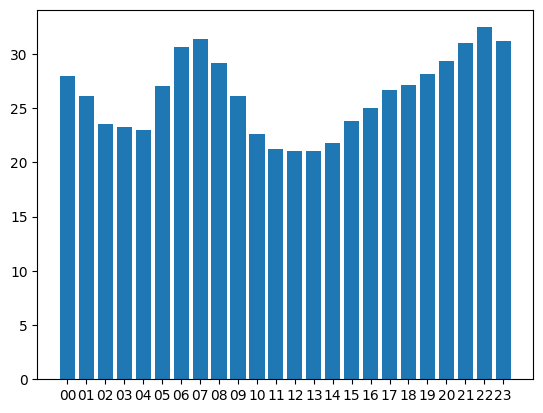

In [127]:
#Cереднє значення для кожної години (виведіть стовбчикову діаграму)

fg=df.groupby('Hour')['value'].mean()
#print('Average concentration of NO2 in a particular hour \n\n',fg)

plt.bar(fg.index, fg.tolist())
plt.show()
